# The Travel Sales Man Problem (TSP) with the genetic algorithm

In [9]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

### Define the population function

In [10]:
# create propulation function
def create_population(population_size, array_size):
    population = []
    for i in range(population_size):
        l=np.arange(array_size)
        random.shuffle(l)
        l=l.tolist()
        population.append(l)
    return np.array(population)


### Define the fitness function

In [11]:
# fitness function

def fitness(array,dataset):
    distance = 0
    ind=[]
    for i in array:
        ind.append(i)
    for i in range(len(ind)):
        if i < len(ind)-1:
            distance += np.sqrt((dataset.iloc[ind[i]].x - dataset.iloc[ind[i+1]].x)**2+(dataset.iloc[ind[i]].y - dataset.iloc[ind[i+1]].y)**2 )  
        else:
            distance += np.sqrt((dataset.iloc[ind[-1]].x - dataset.iloc[ind[0]].x)**2+(dataset.iloc[ind[-1]].y - dataset.iloc[ind[0]].y)**2 )  

    return distance

# selection function 
# Roulette wheel selection
def roulittete_selection(population, fitness, dataset):
    fitness_array = np.array([fitness(population[i],dataset) for i in range(len(population))])
    fitness_array = 1/fitness_array
    prop_fitness = fitness_array / np.sum(fitness_array)
    cum_prop_fitness = np.cumsum(prop_fitness)
    random_number = random.randint(0, 98)/100
    for i, cum_prop in enumerate(cum_prop_fitness):
        if random_number <= cum_prop :
            return population[i] 
        

### CrossOver Functions

In [12]:
# the single crossover function 

def single_crossover(array1, array2):
    # create a random index
    index = random.randint(0, len(array1))
    # perform the crossover
    offspring1 = np.copy(array1)
    offspring2 = np.copy(array2)
    temp1 = np.copy(offspring1[index:]) 
    temp2 = np.copy(offspring2[index:])
    offspring1[index:] = temp2
    offspring2[index:] = temp1
    offspring1[:index] = [i for i in  array1 if i not in temp2]
    offspring2[:index] = [i for i in  array2 if i not in temp1]
    
    return offspring1, offspring2


# the double crossover function

def double_crossover(array1, array2):
    # create 2 random indexes not similar to each other
    index1 = random.randint(0, len(array1) - 1)
    index2 = random.randint(0, len(array1) - 1)
    while index1 == index2:
        index2 = random.randint(0, len(array1) - 1)
    # make sure index1 < index2
    if index1 > index2:
        index1, index2 = index2, index1
    # perform the crossover
    offspring1 = np.copy(array1)
    offspring2 = np.copy(array2)
    temp1 = np.copy(offspring1[index1:index2])
    temp2 = np.copy(offspring2[index1:index2])
    offspring1[index1:index2] = temp2
    offspring2[index1:index2] = temp1
    offspring1[:index1] = [i for i in  array1 if i not in temp2][:index1]
    offspring1[index2:] = [i for i in  array1 if i not in temp2][index1:]
    offspring2[:index1] = [i for i in  array2 if i not in temp1][:index1]
    offspring2[index2:] = [i for i in  array2 if i not in temp1][index1:]
    return offspring1, offspring2



### Mutation Function

In [13]:

# switch 2 bits mutation function

def switch_bit(my_array, mutation_rate):
    array = np.copy(my_array)
    random_number = random.randint(0, 100)/100
    if random_number < mutation_rate:
        # select 2 random indexes
        index1 = random.randint(0, len(array) - 1)
        index2 = random.randint(0, len(array) - 1)
        while index1 == index2:
            index2 = random.randint(0, len(array) - 1)
        if index1 > index2:
            index1, index2 = index2, index1
        # switch the values
        array[index1], array[index2] = array[index2], array[index1]
    return array


# the shuffle element in between

def shuffle_element(my_array, mutation_rate): 
    array = np.copy(my_array)          
    random_number = random.randint(0, 100)/100
    if random_number < mutation_rate:
        # select 2 random indexes
        index1 = random.randint(0, len(array) - 1)
        index2 = random.randint(0, len(array) - 1)
        while index1 == index2:
            index2 = random.randint(0, len(array) - 1)
        if index1 > index2:
            index1, index2 = index2, index1
        # shuffle the values
        array[index1:index2] = np.random.permutation(array[index1:index2])
    return array

### Elite Selection

In [14]:
# keep the best chromosomes 

def next_generation(population, elit_size, fitness,dataset):
    # create the fitness array
    fitness_array = [fitness(population[i],dataset) for i in range(len(population))]
    # sort the fitness array ascendingly and get the indexes
    sorted_index = np.argsort(fitness_array)
    new_population = []
    for i in range(elit_size):
        new_population.append(list(population[sorted_index[i]]))
    return new_population 


### Define the main genetic algorithm function

In [15]:
# the main genetic algorithm function

def TSM_genetic_algorithm(dataset, population_size, elit_size,
                           generations, mutation_rate, next_generation, fitness,
                             selection_func, cross_over_func, mutation_func ):
       
    # create the initial population
    population = create_population(population_size, len(dataset))
    # loop through the generations
    for i in range(generations):
        # create the new population
        new_population = []
        # create the new population using the elitism (exploitation)
        next_gen_arr=next_generation(population, elit_size, fitness,dataset)
        new_population.extend(next_gen_arr)
        # create the remaining population
        while len(new_population) < population_size:
            # select the parents
            parent1 = selection_func(population, fitness,dataset)
            parent2 = selection_func(population, fitness,dataset)
            while np.array_equal(parent1, parent2):
                parent2 = selection_func(population, fitness,dataset)
            # perform the crossover (exploration)
            offspring1, offspring2 = cross_over_func(parent1, parent2)
            # perform the mutation  (exploration)
            offspring1 = mutation_func(offspring1, mutation_rate)
            offspring2 = mutation_func(offspring2, mutation_rate)
            # add the offspring to the new population
            new_population.append(offspring1)
            new_population.append(offspring2)
        # convert the new population to a numpy array
        population = np.array(new_population)
        # if (np.array_equal(next_generation(population, 3, fitness,dataset),next_gen_arr)) and (i>=20):
        #     break
    # return the best solution
    return next_generation(population, 1, fitness,dataset)[0] , i


## Examine The Algorithm 

In [16]:

# Define the dataset of the locations of the points 
dataset = pd.read_excel("15-Points.xlsx")


# Define the parameters of the genetic algorithm
population_size = 50
elit_size = int(population_size * 0.4)
generations = 100
mutation_rate = 0.05

# define the function parameters
selection_func = roulittete_selection
cross_over_func = double_crossover
mutation_func = shuffle_element 

# run the genetic algorithm
TSM = TSM_genetic_algorithm(dataset, population_size, elit_size,
                           generations, mutation_rate, next_generation, fitness,
                             selection_func, cross_over_func, mutation_func )

# print the best solution
print("The best route to minimize the bath is",TSM[0])
print("The number of generations is",TSM[1])
print("The total distance is",fitness(TSM[0],dataset))

The best route to minimize the bath is [11, 13, 5, 3, 10, 0, 12, 1, 7, 9, 8, 14, 4, 6, 2]
The number of generations is 99
The total distance is 301.3583384037503


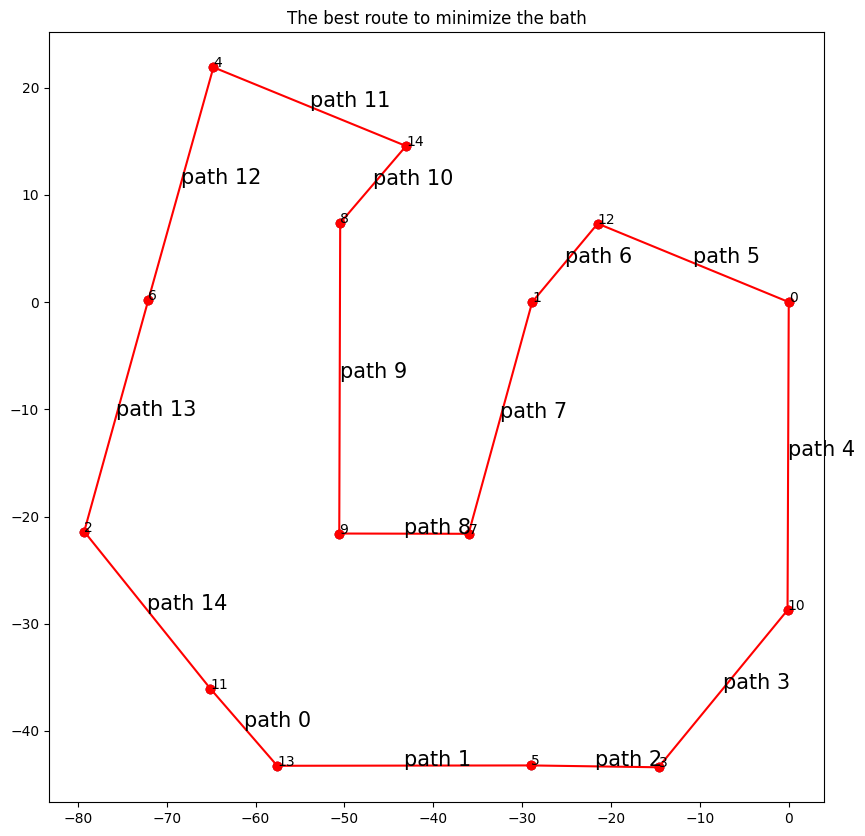

In [17]:
# plot the best solution of the Salesman problem

plt.figure(figsize=(10, 10))
plt.scatter(dataset.x, dataset.y) 
plt.title("The best route to minimize the bath")
# add the city of each point
for i in range(len(dataset)):
    plt.text(dataset.iloc[i].x, dataset.iloc[i].y, str(i))

# number the pathes between the points

for i in range(len(TSM[0])):
    if i < len(TSM[0])-1:
        plt.plot([dataset.iloc[TSM[0][i]].x, dataset.iloc[TSM[0][i+1]].x], [dataset.iloc[TSM[0][i]].y, dataset.iloc[TSM[0][i+1]].y], 'ro-')
        plt.text((dataset.iloc[TSM[0][i]].x+dataset.iloc[TSM[0][i+1]].x)/2, (dataset.iloc[TSM[0][i]].y+dataset.iloc[TSM[0][i+1]].y)/2, str("path "+str(i)) , fontsize=15)
    else:
        plt.plot([dataset.iloc[TSM[0][i]].x, dataset.iloc[TSM[0][0]].x], [dataset.iloc[TSM[0][i]].y, dataset.iloc[TSM[0][0]].y], 'ro-')  
        plt.text((dataset.iloc[TSM[0][i]].x+dataset.iloc[TSM[0][0]].x)/2, (dataset.iloc[TSM[0][i]].y+dataset.iloc[TSM[0][0]].y)/2, str("path "+str(i)), fontsize=15)
